<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="200px">

# **Taller 08: Simulated annealing**

## **Outline**

1. [Ejercicio 1. S.A. cost function](#eje1)
2. [Ejercicio 2. S.A. simule el problema](#eje2)





In [ ]:
#@title 1. MONTAR EL DRIVE **student** { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/course-IA1/ai-uis-student/talleres20202')
print(os.getcwd())
!chmod 777 convert_ipynb.sh run utils/*

---
#### - Usted debe ejecutar **TODAS** las celdas de tipo **CODE**. De lo contrario, sus respuestas no serán procesadas correctamente.

---

# **Simulated annealing: Comunicación en una mesa redonda**


Un grupo de 300 personas de diferentes países se sienta en una mesa circular con 300 sillas. Cada persona sabe hablar dos idiomas (no necesariamente los mismos para todos). Los idiomas se codificarán de la siguiente manera:

*   0: Español
*   1: Inglés
*   2: Alemán
*   3: Francés
*   4: Portugués
*   5: Mandarín
*   6: Coreano
*   7: Noruego
*   8: Italiano
*   9: Persa
*   10: Árabe

Para este taller una mesa se codifica como un arreglo de 300 posiciones, y en cada posición (silla de la mesa) existe una lista de los dos posibles idiomas. Observe la siguiente ilustración.

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/talleres20202/misc/mesaredonda01.png" />

Vamos a generar una **_buena_** solución para que se encuentre una disposición de las personas en la mesa de manera que cada persona pueda comunicarse con sus dos vecinos en la mesa.

- Tenga en cuenta que cada persona debe hablar dos idiomas **diferentes**. Es decir, si $(x_i, x_j)$ es la dupla de idiomas hablados por la persona, se tiene que cumplir que: $\enspace$ $x_i \neq x_j$

Para los siguientes puntos, la mesa redonda se simulará con el siguiente arreglo, donde cada solución es una permutación de los indices de la mesa. 

[ 81  80 157 277 100 106 278  82  67 135  18 202  65   7  99 109 104 189
 138 162  12 117  54 280 199  64 203 121 256 207 297 242 179   4  25 289
 165 205  20 265 105 168 292  85  61 126 254  40  63 268 139 259 214 245
  50  49 235 290 250 156 222  43 291 208   3 152 210 224  36 163  23 200
 188  98 246 151 111  89 180 194 174 161 191  57 158 110 176 103 170  93
 134 140  87 284 241 231 244 107 219  38  88  94 293  19  60 282  86 144
  32 198 248 141 264 221 255 125  46   9 153 148 257  21 228 287  69  11
 150 167 263 230  22  45 233 276  56 190 274  74  92  30 173 232 260 196
 127 261  27  62 145 252 193  55  37 160 251 258 183  97  16  39   0  29
 247 286  68 171 129 149 275 184 169 239 143 155 204 253 108  83  48  35
  13 132  26 175 102 142  70 266  76 187 137 123 273 114   8 172 296 101
 234 288 240 192 122 281   5   1 236 227 237 270 269 197 182 285 112 215
  24 206  72  42  41  78 225 249  15 178 213 113  47  77 262  10 181 209
 298  31  58  14 185 271  66  96 133   6 283 217 11

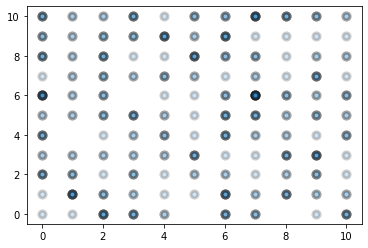

In [ ]:
#@title **code** codificación de la mesa y dos posibles soluciones
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Generamos 300 personas con sus dos idiomas hablados
mesa_redonda = np.array([[7,4],[4,9],[0,4],[2,9],[3,0],[5,9],[9,3],[3,1],[7,0],[5,0],[5,10],[6,1],[1,7],[6,1],[0,9],[1,6],[4,7],[0,10],[1,7],[5,3],[8,2],[7,4],[10,1],[4,7],[2,6],[3,10],[5,6],[2,6],[5,2],[2,0],[9,4],[7,1],[1,8],[8,7],[5,3],[8,2],[3,9],[4,1],[5,6],[10,7],[4,6],[0,5],[4,3],[10,8],[5,10],[3,6],[10,4],[8,2],[6,7],[9,1],[4,0],[6,8],[8,6],[2,9],[10,1],[10,5],[5,8],[2,3],[8,9],[4,8],[8,5],[8,9],[7,6],[10,0],[2,1],[7,4],[10,7],[7,4],[5,4],[4,8],[8,0],[6,3],[0,4],[2,5],[9,4],[10,9],[0,6],[4,7],[10,7],[10,5],[9,6],[1,5],[3,1],[7,0],[10,2],[5,0],[4,7],[2,8],[0,3],[6,0],[9,7],[10,3],[10,7],[9,6],[3,10],[1,5],[2,5],[4,6],[6,2],[1,6],[9,0],[10,2],[4,0],[8,0],[6,9],[10,8],[1,0],[7,1],[0,4],[2,0],[5,4],[4,1],[7,2],[8,7],[4,6],[10,2],[3,10],[7,0],[2,10],[8,5],[0,9],[4,3],[3,9],[9,5],[5,0],[3,8],[4,7],[1,6],[0,9],[1,3],[4,5],[8,9],[8,10],[10,4],[8,4],[9,3],[6,3],[8,10],[9,8],[3,0],[10,0],[0,10],[3,5],[10,3],[8,3],[5,3],[1,10],[4,0],[4,9],[5,3],[5,4],[3,0],[10,0],[4,5],[1,6],[6,4],[6,2],[0,3],[0,10],[0,7],[6,9],[9,5],[1,2],[7,6],[0,6],[7,6],[4,2],[3,7],[5,3],[4,7],[10,9],[3,10],[10,7],[7,8],[9,5],[1,2],[8,1],[5,10],[8,6],[0,4],[7,3],[6,9],[7,10],[9,2],[9,7],[8,5],[3,1],[9,7],[1,3],[10,2],[8,0],[3,0],[5,1],[3,5],[6,1],[6,1],[9,6],[7,1],[3,10],[8,2],[3,9],[5,2],[0,1],[0,9],[3,1],[5,4],[1,10],[5,3],[1,10],[1,5],[10,7],[10,7],[9,2],[8,7],[7,9],[6,7],[10,6],[0,1],[5,8],[7,8],[7,10],[8,9],[3,10],[5,3],[8,5],[3,9],[7,6],[1,6],[8,7],[5,4],[2,9],[7,10],[1,10],[0,8],[8,7],[10,0],[5,10],[3,0],[5,10],[10,5],[10,2],[8,0],[4,6],[10,3],[8,3],[7,4],[1,2],[9,1],[7,0],[1,7],[6,0],[10,7],[0,3],[6,8],[8,6],[1,10],[8,4],[5,2],[3,9],[0,6],[10,7],[0,2],[5,2],[0,6],[10,9],[1,7],[0,10],[5,0],[1,4],[10,4],[4,1],[3,2],[4,0],[9,0],[7,4],[4,0],[1,9],[4,1],[9,1],[1,8],[3,4],[5,4],[3,8],[4,0],[1,5],[3,5],[0,8],[10,1],[4,10],[1,7],[10,0],[2,0],[7,4],[0,7],[4,5],[9,1],[6,10],[8,3],[0,2],[7,0]])
n_personas = len(mesa_redonda)

plt.scatter(mesa_redonda[:,0], mesa_redonda[:,1], s=50, alpha=0.2, edgecolors="black", linewidths=3)

solucion1 = np.random.permutation(n_personas)
solucion2 = np.random.permutation(n_personas)

print(solucion1)
print(solucion2)

# **Inicializar población**  <a name="eje1"></a>

Podemos usar la misma función de inicialización vista en clase, teniendo en cuenta que la codificación de las soluciones se simplifica a mutaciones. Entonces usaremos la siguiente función


In [ ]:
#@title **code** generación de posibles formas de sentarse
def TSP_initialize_population1(n_individuals, n_personas):
    r = []
    for i in range(n_individuals):
        r.append(np.random.permutation(n_personas))
    return np.array(r)

# **Ejercicio 1. S.A. cost function**  <a name="eje1"></a>

Complete la función de costo ````TSP_cost1```` para ponderar cada solución teniendo en cuenta el número de vecinos que pueden hablarse, de la siguiente manera:

- Si no es posible hablar el mismo idioma que ambos vecinos, la función de costo debe incrementar 100 unidades.
- De lo contrario, la función de costo debe incrementar solamente 1 unidad.
- Tenga en cuenta los índices que corresponden a la primera posición (índice 0) y a la última posición (índice 299) son considerados **VECINOS**.


**Recomendación:** para simplificar el problema, valide que CUALQUIERA de los dos idiomas hablados por la persona SIGUIENTE, sea el mismo que CUALQUIERA de los dos idiomas que habla la persona actual.

**UTILICE LA MISMA FUNCIÓN DEL TALLER ANTERIOR**



In [ ]:
#@title **Escriba su código aquí!**
#@markdown No modifique las dos últimas lineas

def TSP_cost1(personas, solution):
    costo = 0
    sol_personas = personas[solution]
    for i in range(sol_personas.shape[0]):
     


     
    return costo



import urllib.parse, inspect
src1 = urllib.parse.quote_plus(inspect.getsource(TSP_cost1))

In [ ]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PS7_1 $src1

# **Ejercicio 2.**  <a name="eje2"></a>

Simule el algoritmo de simulated annealing en el problema de la mesa redonda. Puede utilizar también las funciones vistas en clase. 

- Al final escriba algunas conclusiones relacionadas con las siguientes preguntas orientadoras para comparar esta solución con la GA. 

- En cuanto al número de iteraciones ¿cuál método es mas eficiente?
- En cuanto a menor costo ¿cuál método es mejor?
- ¿Qué ventajas puede resaltar de simmulated annealing?

Teniendo en cuenta la codificación del problema, podemos usar las funciones de mutación que vimos en clase.

In [ ]:
#@title **code** mutation
def TSP_mutate1(solution, mutation_prob):
    mutated_solution = np.copy(solution)
    for i in range(len(solution)):
        if np.random.random()<mutation_prob:
            j = i+1 if i!=len(solution)-1 else 0
            tmp = mutated_solution[i]
            mutated_solution[i] = mutated_solution[j]
            mutated_solution[j] = tmp
    return mutated_solution

In [ ]:
# Escriba aca la simulación con simulated annealing! 







# **Pasos Finales.**



#### 1. Reemplace la variable con su código de estudiante

In [ ]:
#@title **1. Complete la siguiente información:**
taller_name = "Taller_std_08_20202" #@param {type:"string"}
codigo_name = "tl8_12345" #@param {type:"string"}


import urllib.parse, inspect
taller = urllib.parse.quote_plus(taller_name)
codigo = urllib.parse.quote_plus(codigo_name)

print(taller, codigo)

In [ ]:
#@title **2. Guarde los cambios del taller**
%%javascript
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});

<IPython.core.display.Javascript object>

In [ ]:
#@title **3. Ejecute la siguiente celda y envíe el archivo**
!./convert_ipynb.sh $codigo $taller

---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;"/>